## Preprocessing

In [63]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [64]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns= ['EIN','NAME'])

In [65]:
# Determine the number of unique values in each column.
print(application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [66]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_count = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_count)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [67]:
# Choose a cutoff value and create a list of application types to be replaced

cutoff_value = 200

# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_count[application_type_count < cutoff_value].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [68]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_count = application_df['CLASSIFICATION'].value_counts()
print(classification_count)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [69]:
# You may find it helpful to look at CLASSIFICATION value counts >1
print(classification_count[classification_count > 1])

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [70]:
# Choose a cutoff value and create a list of classifications to be replaced
cutoff_value = 1500
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < cutoff_value].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [71]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_data = application_df[['AFFILIATION', 'USE_CASE', 'ORGANIZATION','SPECIAL_CONSIDERATIONS','APPLICATION_TYPE','CLASSIFICATION','INCOME_AMT']]
categorical_data = pd.get_dummies(categorical_data).astype('int')
categorical_data

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
34297,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [72]:
# make a copy of the application_dd and drop the columns with categorical data
application_df_copy = application_df.copy()
application_df_copy = application_df_copy.drop(columns=['AFFILIATION', 'USE_CASE', 'ORGANIZATION','SPECIAL_CONSIDERATIONS','APPLICATION_TYPE','CLASSIFICATION','INCOME_AMT'])
# Concatenate the copy df and the categorical data
application_processed_df = pd.concat([application_df_copy,categorical_data], axis=1)
application_processed_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,5000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,5000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,1,5000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [73]:
# Split our preprocessed data into our features and target arrays
y = application_processed_df['IS_SUCCESSFUL'].values
X = application_processed_df.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [74]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [105]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 8
hidden_nodes_layer5 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))
# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))
# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                     │ (None, 16)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207 (4.71 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [110]:
# Create a callback to save the model's weights every 5 epochs
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="model_weights_epoch_{epoch:02d}.weights.h5",
    save_weights_only=True,
    save_freq=5 * X_train.shape[0],
    verbose=1
)

In [116]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=120, callbacks=[checkpoint_callback])

Epoch 1/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7372 - loss: 0.5395
Epoch 2/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7435 - loss: 0.5347
Epoch 3/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7406 - loss: 0.5368
Epoch 4/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7400 - loss: 0.5410
Epoch 5/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7401 - loss: 0.5379
Epoch 6/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7402 - loss: 0.5357
Epoch 7/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7393 - loss: 0.5374
Epoch 8/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7398 - loss: 0.5375
Epoch 9/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7390 - loss: 0.5397
Epoch 10/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7378 - loss: 0.5360
Epoch 11/120
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7434 - loss: 0.5343
Epoch 12/120
804/804 ━━━━━━━━━━━━━━━━━━━━

In [112]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7254 - loss: 0.5558
Loss: 0.5557709336280823, Accuracy: 0.7253644466400146


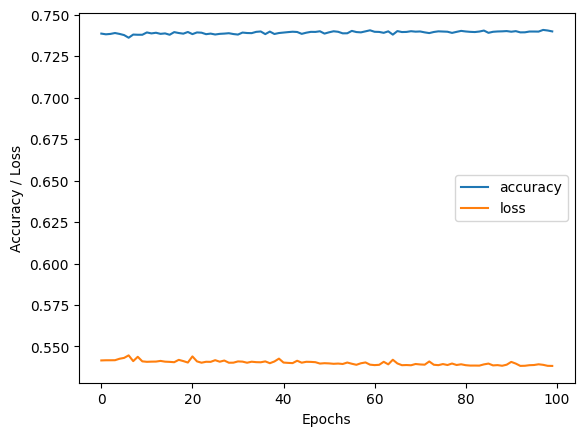

In [113]:
# Plot accuracy and loss over the epochs using fit_model
plt.plot(fit_model.history['accuracy'], label='accuracy')
plt.plot(fit_model.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

In [114]:
# Step 1: Make predictions on the test set
y_pred = nn.predict(X_test_scaled)

# Step 2: Convert the predictions to binary (threshold of 0.5)
y_pred_binary = (y_pred > 0.5).astype("int32")

# Step 3: Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Step 4: Print confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
 [[2592 1411]
 [ 944 3628]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      4003
           1       0.72      0.79      0.75      4572

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575



In [118]:
# Export our model to HDF5 file
model_filename = 'AlphabetSoupCharity_Optimization.h5'
nn.save(model_filename)

print(f"Model saved to {model_filename}")
model_filename = 'AlphabetSoupCharity.keras'
nn.save(model_filename)

print(f"Model saved to {model_filename}")

Model saved to AlphabetSoupCharity_Optimization.h5
Model saved to AlphabetSoupCharity.keras
